# Разбор Titanic ML competition с Kaggle

https://stepik.org/lesson/223852/step/1?unit=196663

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# импорт датасета

df = pd.read_csv('C:\\Users\\Nike\\JNotebook\\Datasets\\Titanic\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# проверка количества пропущенных значений в датасете

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# удаление из вектора X ненужных колонок

X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
# заполнение пропущенных значений
# замена строковых значений на числовые при помощи get_dummies()

X = X.fillna({'Age': X.Age.median(), 'Embarked': 0})
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [6]:
# проверка, что незаполненных значений в колонках больше нет

X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_0    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
# заполнение значений переменной y для обучения дерева решений

y = df.Survived

In [8]:
# создание дерева решений

clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [9]:
# обучение дерева

clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [10]:
# процент верных ответов

clf.score(X, y)

0.9797979797979798

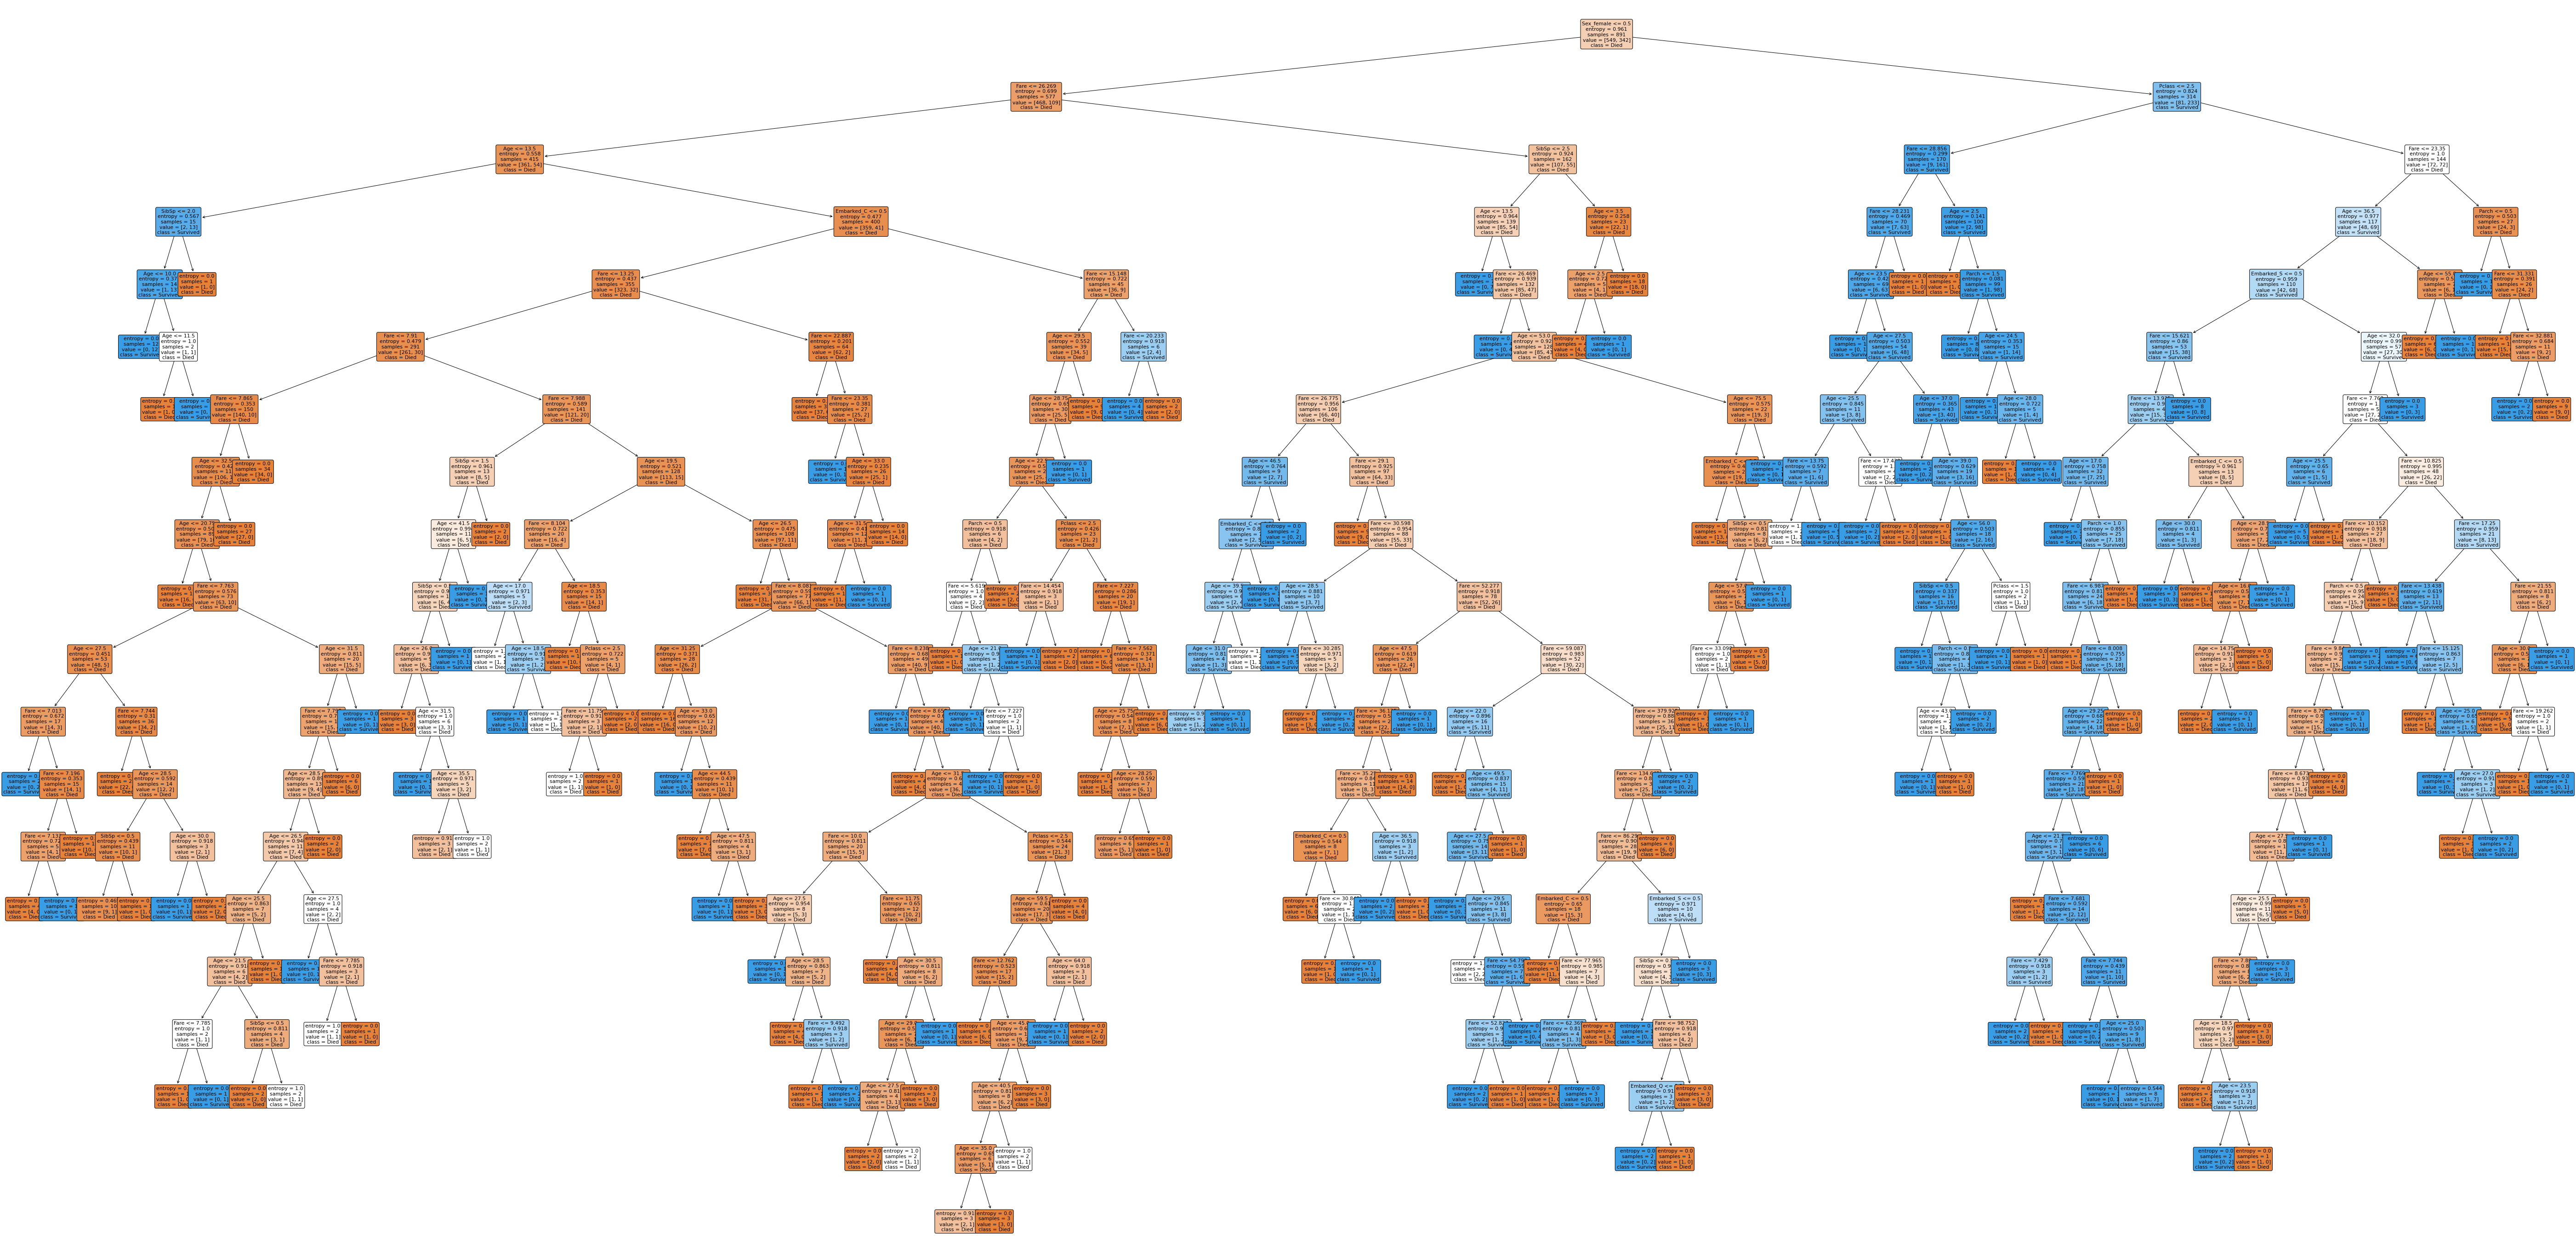

In [12]:
# визуализация

plt.figure(figsize=(100, 50))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 11)
plt.show()

Переобучение модели налицо и с этим нужно что-то делать.

In [11]:
# разделим X и y на подмножества в соотношении 1/3 к 2/2 (тестовая выборка к тренировочной)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train.shape

(596, 11)

In [13]:
X_test.shape

(295, 11)

In [14]:
# обучим дерево на тренировочной выборке

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
# процент верных ответов тренировочной выборки

clf.score(X_train, y_train)

0.9798657718120806

In [16]:
# процент верных ответов на тестовой выборке, на которой не было обучения

clf.score(X_test, y_test)

0.7728813559322034

In [17]:
# ограничим глубину вопросов дерева к данным и обучим заново на train выборке

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
# процент верных ответов тренировочной выборки

clf.score(X_train, y_train)

0.8238255033557047

In [19]:
# процент верных ответов на тестовой выборке, на которой не было обучения

clf.score(X_test, y_test)

0.8203389830508474

In [20]:
# посчитаем очки для выборки

scores_data = pd.DataFrame()
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [21]:
# получим глубину выборки при которой имеем максимальное количество очков на тестовой выборке

max_scores = scores_data.test_score.max()
scores_data.query('test_score == @max_scores')

,max_depth,train_score,test_score
0,4,0.833893,0.823729


<AxesSubplot:>

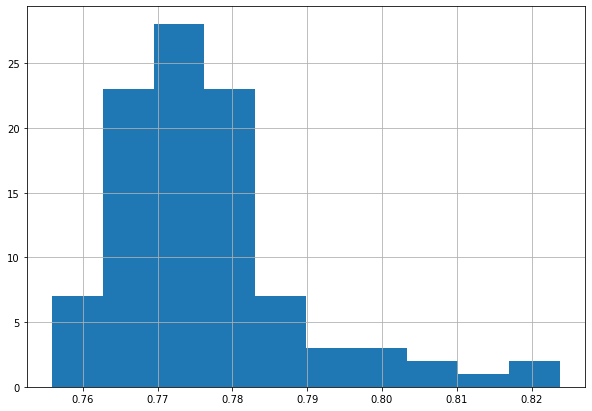

In [22]:
# визуализация распределения scores по количеству ответов

scores_data.test_score.hist(figsize=(10,7))

In [23]:
# преобразуем получившийся датасет в формат, когда тип выборки и очки объединены в две колонки соответственно

scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                                   var_name='set_type', value_name='score')

In [24]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

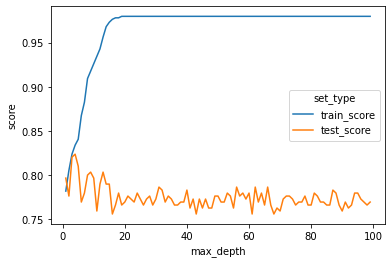

In [25]:
# визуализируем получившийся датасет, на котором видно, что наилучшие очки на глубине 3-5 и затем уровень снижается

sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

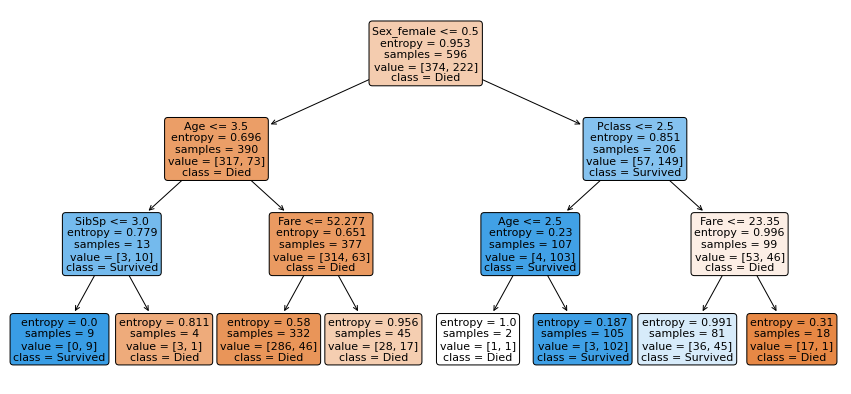

In [26]:
# визуализируем дерево для оптимальной глубины решений

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 7))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 11)
plt.show()

In [27]:
# рассчитаем среднее значение кроссвалидированных scores

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

In [28]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7903221288515405

In [29]:
# добавим в датасет с очками для выборки среднее значение кроссвалидированных scores

scores_data = pd.DataFrame()
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392


In [30]:
# преобразуем получившийся датасет в формат, когда тип выборки и очки объединены в две колонки соответственно

scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

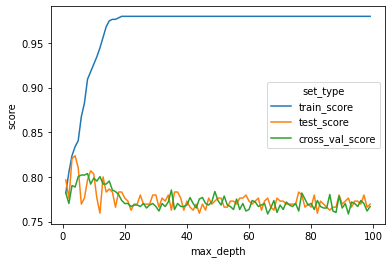

In [31]:
# визуализируем получившийся датасет, на котором видно, что наилучшие очки на глубине 6 и затем уровень снижается

sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

In [32]:
# подтверждение наилучшего уровня глубины решений

max_cross_val_score = scores_data_long.query('set_type == "cross_val_score"').score.max()
scores_data_long.query('set_type == "cross_val_score" & score == @max_cross_val_score')

,max_depth,set_type,score
205,8,cross_val_score,0.803725


In [33]:
# расчет scores для тестовой выборки при оптимальной глубине дерева решений

best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.7661016949152543

In [34]:
# создаем "пустое" дерево решений

clf = tree.DecisionTreeClassifier()

In [35]:
# создаем словарь с параметрами, которые нужно подобрать

parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}

In [36]:
# создаем класс "комбайна", который будет подбирать нам параметры

crid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [37]:
# обучим этот классификатор на тренировочной выборке

crid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [38]:
# выведем параметры, для которых значение accuracy будет максимальным

crid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [39]:
# выберем и сохраним лучший классификатор

best_clf = crid_search_cv_clf.best_estimator_

In [40]:
# получим точность предсказания для тестовой выборки

best_clf.score(X_test, y_test)

0.7661016949152543

In [41]:
# расчитаем предсказания целевых значений для тестовой выборки при помощи лучшего классификатора

y_pred = best_clf.predict(X_test)

In [42]:
# рассчитаем precision

precision_score(y_test, y_pred)

0.7339449541284404

In [43]:
# рассчитаем recall

recall_score(y_test, y_pred)

0.6666666666666666

In [44]:
# вероятность отнесения каждого пассажира к классу утонувших и выживших

y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [45]:
# определим порядок классов - какой класс определяет утонувших (0), какой выживших (1)
best_clf.classes_

array([0, 1], dtype=int64)

<AxesSubplot:>

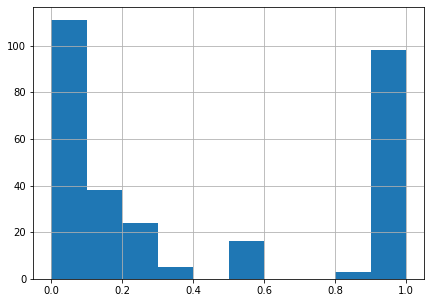

In [46]:
# диаграмма распределения вероятности выживания пассажиров в результате катастрофы

pd.Series(y_predicted_prob[:, 1]).hist(figsize=(7,5))

In [47]:
# изменим вероятность отнесения предсказаний к классу выживших, при вероятности выше 0.8

y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [48]:
# рассчитаем precision для уточненного вектора y_pred

precision_score(y_test, y_pred)

0.7722772277227723

In [49]:
# рассчитаем recall для уточненного вектора y_pred

recall_score(y_test, y_pred)

0.65

In [50]:
# добавим в параметры обучения модели min_samples_split и min_samples_leaf
# min_samples_split - минимальное количество сэмплов, которые можно продолжать разбивать
# min_samples_leaf - минимальное количество "листьев", которое должно получиться после разбиения

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

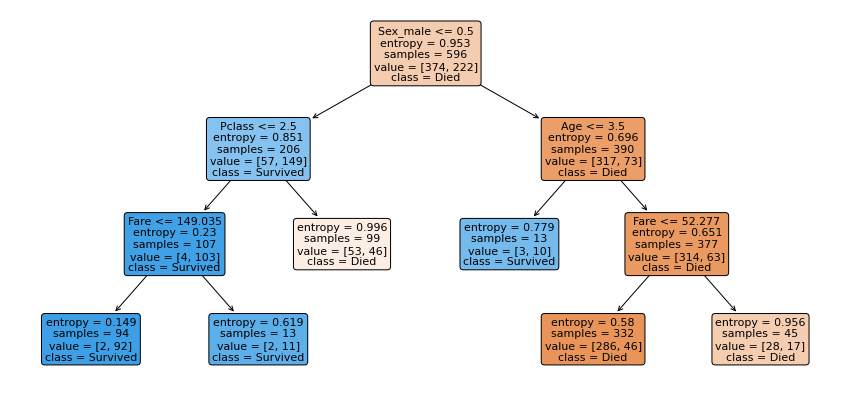

In [51]:
plt.figure(figsize=(15, 7))
tree.plot_tree(clf, 
               feature_names=list(X), 
               class_names=['Died', 'Survived'], 
               filled=True,
               rounded=True,
               fontsize = 11)
plt.show()

In [64]:
# обучим random forest
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}

grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [65]:
# выведем лучшие параметры

grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [66]:
# выберем и обучим лучший предсказатель, выведем score модели

best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.7864406779661017

In [67]:
# выведем параметры модели в порядке убывания их важности

feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                       'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,2.270346e-01
5,Sex_female,1.764035e-01
4,Fare,1.684327e-01
1,Age,1.567627e-01
0,Pclass,1.209331e-01
2,SibSp,5.561175e-02
3,Parch,3.477192e-02
8,Embarked_C,3.011845e-02
10,Embarked_S,2.237782e-02
9,Embarked_Q,7.553107e-03


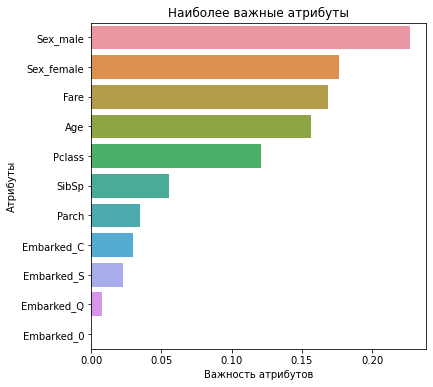

In [68]:
# визуализируем параметры

sorted_feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=sorted_feature_importances_df.features, x=sorted_feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()